In [ ]:
! nvidia-smi

Fri Sep  4 02:53:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
% tensorflow_version 2.x

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation, Dense

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

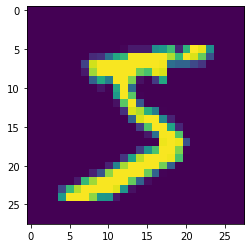

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [ ]:
n_classes  = 10 
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test  = tf.keras.utils.to_categorical(y_test, n_classes)

In [ ]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_input    = 784 
n_classes  = 10 

training_epochs = 15
batch_size = 100

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))
model.add(Dense(n_hidden_2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.2410 - accuracy: 0.9295 - val_loss: 0.1153 - val_accuracy: 0.9649
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0913 - accuracy: 0.9722 - val_loss: 0.0759 - val_accuracy: 0.9761
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.0748 - val_accuracy: 0.9767
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0841 - val_accuracy: 0.9745
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0741 - val_accuracy: 0.9771
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0249 - accuracy: 0.9919 - val_loss: 0.0689 - val_accuracy: 0.9801
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0818 - val_accuracy: 0.9769
Epoch 

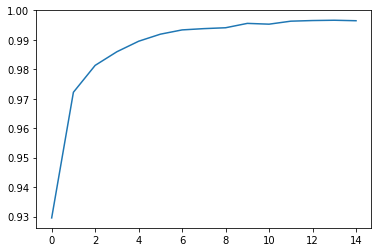

In [ ]:
plt.plot(range(len(history.history.get('accuracy'))), history.history.get('accuracy'))

In [ ]:
#model.get_weights()

In [ ]:
import requests, os
baidu_url = 'https://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&ct=201326592&is=&fp=result&queryWord={}&cl=2&lm=-1&ie=utf-8&oe=utf-8&adpicid=&st=-1&z=&ic=0&hd=&latest=&copyright=&word={}&s=&se=&tab=&width=&height=&face=0&istype=2&qc=&nc=1&fr=&expermode=&force=&pn={}&rn=30&gsm=78&1596254720074='
def getIdolImage(path, term, pagenum):
  if not os.path.exists(path):
    os.mkdir(path)
  for p in range(pagenum):
    try:
      res = requests.get(baidu_url.format(term, term, pagenum * 30))
      jd = res.json()
      for img in jd['data']:
        if img.get('middleURL'):
          getPicture(path, img.get('middleURL'))
    except:
      pass
def getPicture(path, url):
  res = requests.get(url)
  with open('{}/{}.jpg'.format(path, url.split('u=')[1].split('&')[0]) , 'wb') as f:
    f.write(res.content)

In [ ]:
getIdolImage('idol1/','劉德華', 10)

In [ ]:
getIdolImage('idol2/','張學友', 3)

In [ ]:
getIdolImage('idol3/','周星馳', 3)

In [ ]:
import os
def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
          if True:
          #try:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((64,64))
            crpim.save(dest + filename)
          #except:
          #  pass

In [ ]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-09-04 03:56:53--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2020-09-04 03:56:53 (22.5 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
import cv2 as cv
from PIL import Image
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
cropIdolFace('idol1/', 'idol1_face/')

In [ ]:
cropIdolFace('idol2/', 'idol2_face/')

In [ ]:
cropIdolFace('idol3/', 'idol3_face/')

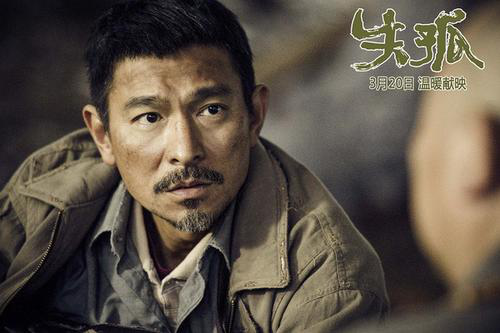

In [ ]:
from PIL import Image
#! ls idol2_face
Image.open('idol1/1387635919,342782246.jpg')

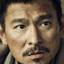

In [ ]:
from PIL import Image
#! ls idol2_face
Image.open('idol1_face/1387635919,342782246.jpg')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(filters=32, 
           kernel_size=(3, 3),  padding = 'same',
           input_shape = (64, 64, 3),
           activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(filters=32, 
          kernel_size=(3, 3), 
          padding = 'same', 
          activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 
classifier.add(Dense(units = 3, activation = 'softmax'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [ ]:
classifier.compile(optimizer = 'adam', 
          loss ='categorical_crossentropy', 
          metrics = ['accuracy'])

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
           rescale = 1./255,
           shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
           zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
           horizontal_flip = True #水平翻转操作
         )

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [ ]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.33, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [ ]:
splitDataset('idol1_face/')

In [ ]:
splitDataset('idol2_face/')

In [ ]:
splitDataset('idol3_face/')

In [ ]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (64, 64),
     batch_size = 16,
     class_mode = 'categorical')

Found 23 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (64, 64),
    batch_size = 16, 
    class_mode = 'categorical')

Found 13 images belonging to 3 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                  epochs=100,
                  verbose = 1,
                  validation_data = test_set)

In [ ]:
%cd /content/
! git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git

/content
Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2326, done.
remote: Total 2326 (delta 0), reused 0 (delta 0), pack-reused 2326
Receiving objects: 100% (2326/2326), 8.09 MiB | 4.08 MiB/s, done.
Resolving deltas: 100% (1493/1493), done.


In [ ]:
%cd /content/pytorch-CycleGAN-and-pix2pix
! bash ./scripts/download_cyclegan_model.sh style_cezanne

/content/pytorch-CycleGAN-and-pix2pix
Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_cezanne]
for details.

--2020-09-04 07:11:58--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_cezanne.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_cezanne_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  13.5MB/s    in 3.4s    

2020-09-04 07:12:02 (12.8 MB/s) - ‘./checkpoints/style_cezanne_pretrained/latest_

In [ ]:
! pip install dominate

In [ ]:
! wget https://i0.wp.com/blog.kkday.com/wp-content/uploads/batch_IMG_9934.jpg

--2020-09-04 07:13:26--  https://i0.wp.com/blog.kkday.com/wp-content/uploads/batch_IMG_9934.jpg
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118414 (116K) [image/jpeg]
Saving to: ‘batch_IMG_9934.jpg’

batch_IMG_9934.jpg  100%[===================>] 115.64K  --.-KB/s    in 0.009s  

2020-09-04 07:13:28 (12.2 MB/s) - ‘batch_IMG_9934.jpg’ saved [118414/118414]



In [ ]:
% cd /content/pytorch-CycleGAN-and-pix2pix
! python test.py --dataroot /content/ --name style_cezanne_pretrained --model test --no_dropout

/content/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/                     	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

In [ ]:
! ls ./results/style_cezanne_pretrained/test_latest/images

batch_IMG_9934_fake.png  edges2cats_fake.png
batch_IMG_9934_real.png  edges2cats_real.png


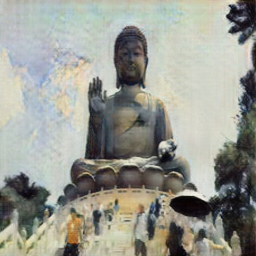

In [ ]:
from PIL import Image
Image.open('./results/style_cezanne_pretrained/test_latest/images/batch_IMG_9934_fake.png')